In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Let's understand or data before woring on this after which we'll do different EDA and datapreprocessing to get more outputs from our data

W - This indicates the number of Wins credited to a pitcher: number of games where
pitcher was pitching while their team took the lead and went on to win.

R - This indicates Runs scored. A run is scored when a player advances around first,
second and third base and returns safely to home plate, touching the bases in that order,
before three outs are recorded and all obligations to reach base safely on batted balls
are met or assured: number of times a player crosses home plate.

AB - This means At bat or time at bat. It&#39;s is a batter&#39;s turn batting against a pitcher: plate
appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or
obstruction.

H - This means Hit. It&#39;s also called a &quot;base hit&quot;, is credited to a batter when the batter
safely reaches or passes first base after hitting the ball into fair territory, without the
benefit of either an error or a fielder&#39;s choice: reaching base because of a batted, fair ball
without error by the defense.

2B - This means the act of a batter striking the pitched ball and safely reaching second
base without being called out by the umpire, without the benefit of a fielder&#39;s misplay
(see error) or another runner being put out on a fielder&#39;s choice. A double is a type of hit
(the others being the single, triple and home run) and is sometimes called a &quot;two-
bagger&quot; or &quot;two-base hit&quot;: hits on which the batter reaches second base safely without
the contribution of a fielding error.

3B - This measns a Triple.It&#39;s is the act of a batter safely reaching third base after hitting
the ball, with neither the benefit of a fielder&#39;s misplay nor another runner being put out on
a fielder&#39;s choice. A triple is sometimes called a &quot;three-bagger&quot; or &quot;three-base hit&quot;: hits
on which the batter reaches third base safely without the contribution of a fielding error.

HR - This means Home runs. It&#39;s scored when the ball is hit in such a way that the batter
is able to circle the bases and reach home plate safely in one play without any errors
being committed by the defensive team. A home run is usually achieved by hitting the
ball over the outfield fence between the foul poles (or hitting either foul pole) without the
ball touching the field: hits on which the batter successfully touched all four bases,
without the contribution of a fielding error.

BB - This means Base on balls (also called a &quot;walk&quot;). It occurs in baseball when a batter
receives four pitches that the umpire calls balls, and is in turn awarded first base without
the possibility of being called out: hitter not swinging at four pitches called out of the
strike zone and awarded first base.

SO - Also denoted as &quot;K&quot; means Strikeout. It occurs when a batter accumulates three
strikes during a time at bat. It usually means that the batter is out: number of batters who
received strike three.

SB - This means Stolen base. It occurs when a runner advances to a base to which they
are not entitled and the official scorer rules that the advance should be credited to the
action of the runner: number of bases advanced by the runner while the ball is in the
possession of the defense.

RA - This means Run Average. It refer to measures of the rate at which runs are allowed
or scored.

ER - This means Earned run. It refers to any run that was fully enabled by the offensive
team&#39;s production in the face of competent play from the defensive team: number of runs
that did not occur as a result of errors or passed balls.

ERA - This means Earned Run Average. It refers to the average of earned runs allowed
by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is
determined by dividing the number of earned runs allowed by the number of innings
pitched and multiplying by nine: total number of earned runs (see &quot;ER&quot; above), multiplied
by 9, divided by innings pitched.

CG - This means Complete Game. It&#39;s the act of a pitcher pitching an entire game
without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited
with a complete game regardless of the number of innings played: number of games
where player was the only pitcher for their team.

SHO - This means Shutout. It refers to the act by which a single pitcher pitches a
complete game and does not allow the opposing team to score a run: number of
complete games pitched with no runs allowed.

SV - This means Save. It&#39;s credited to a pitcher who finishes a game for the winning
team under certain prescribed circumstances: number of games where the pitcher
enters a game led by the pitcher&#39;s team, finishes the game without surrendering the
lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the
pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or
(c) the pitcher pitched three or more innings.

E - This means Errors. It&#39;s an act, in the judgment of the official scorer, of a fielder
misplaying a ball in a manner that allows a batter or baserunner to advance one or more
bases or allows a plate appearance to continue after the batter should have been put
out. The term error is sometimes used to refer to the play during which an error was
committed: number of times a fielder fails to make a play he should have made with
common effort, and the offense benefits as a result.

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting win or lose.

In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


With the above we can see last 5 rows of our dataset, by which we can see that which factor is affecting win or lose.

In [6]:
df.shape

(30, 17)

By the above function we can see that we are having 30 rows and 17 columns  in our dataset.

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here we can see that we have only 2 types of data that is interger and float and both can work as it is for our machine learning model and we do not have to change it in any other format which is good for us.

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see that we are not having any null values in our dataset which is beneficial for us and we do not have to treat null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<Axes: >

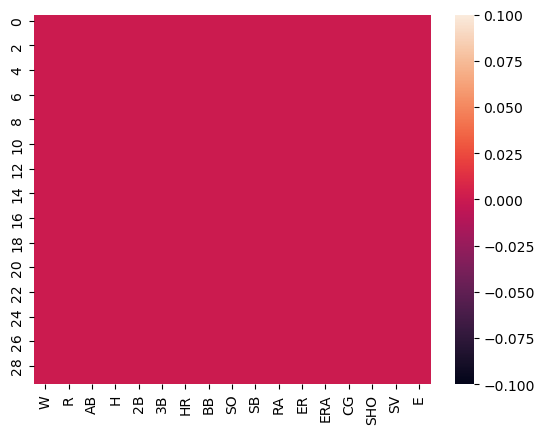

In [12]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers.

In [13]:
df.nunique().to_frame("Unique values")

,Unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


We can see we are having maximum unique values, which will be helpful in analysing data.

In [14]:
df.duplicated().sum()

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we o not have to lose our data.

In [16]:
df.describe()  

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Following is the complete numeric analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value. 

Here are some observation as per above data.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can also see that H, HR, BB column having mean greater than it's median which means it's right skewed and we'll have to treat it which we'll do further.

Whereas SO, RA, ER, column having median greater than it's mean which means it's left skewed and we'll have to treat it which we'll do further.

By analysing the data we can see that there is difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will treat it further.

In [17]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


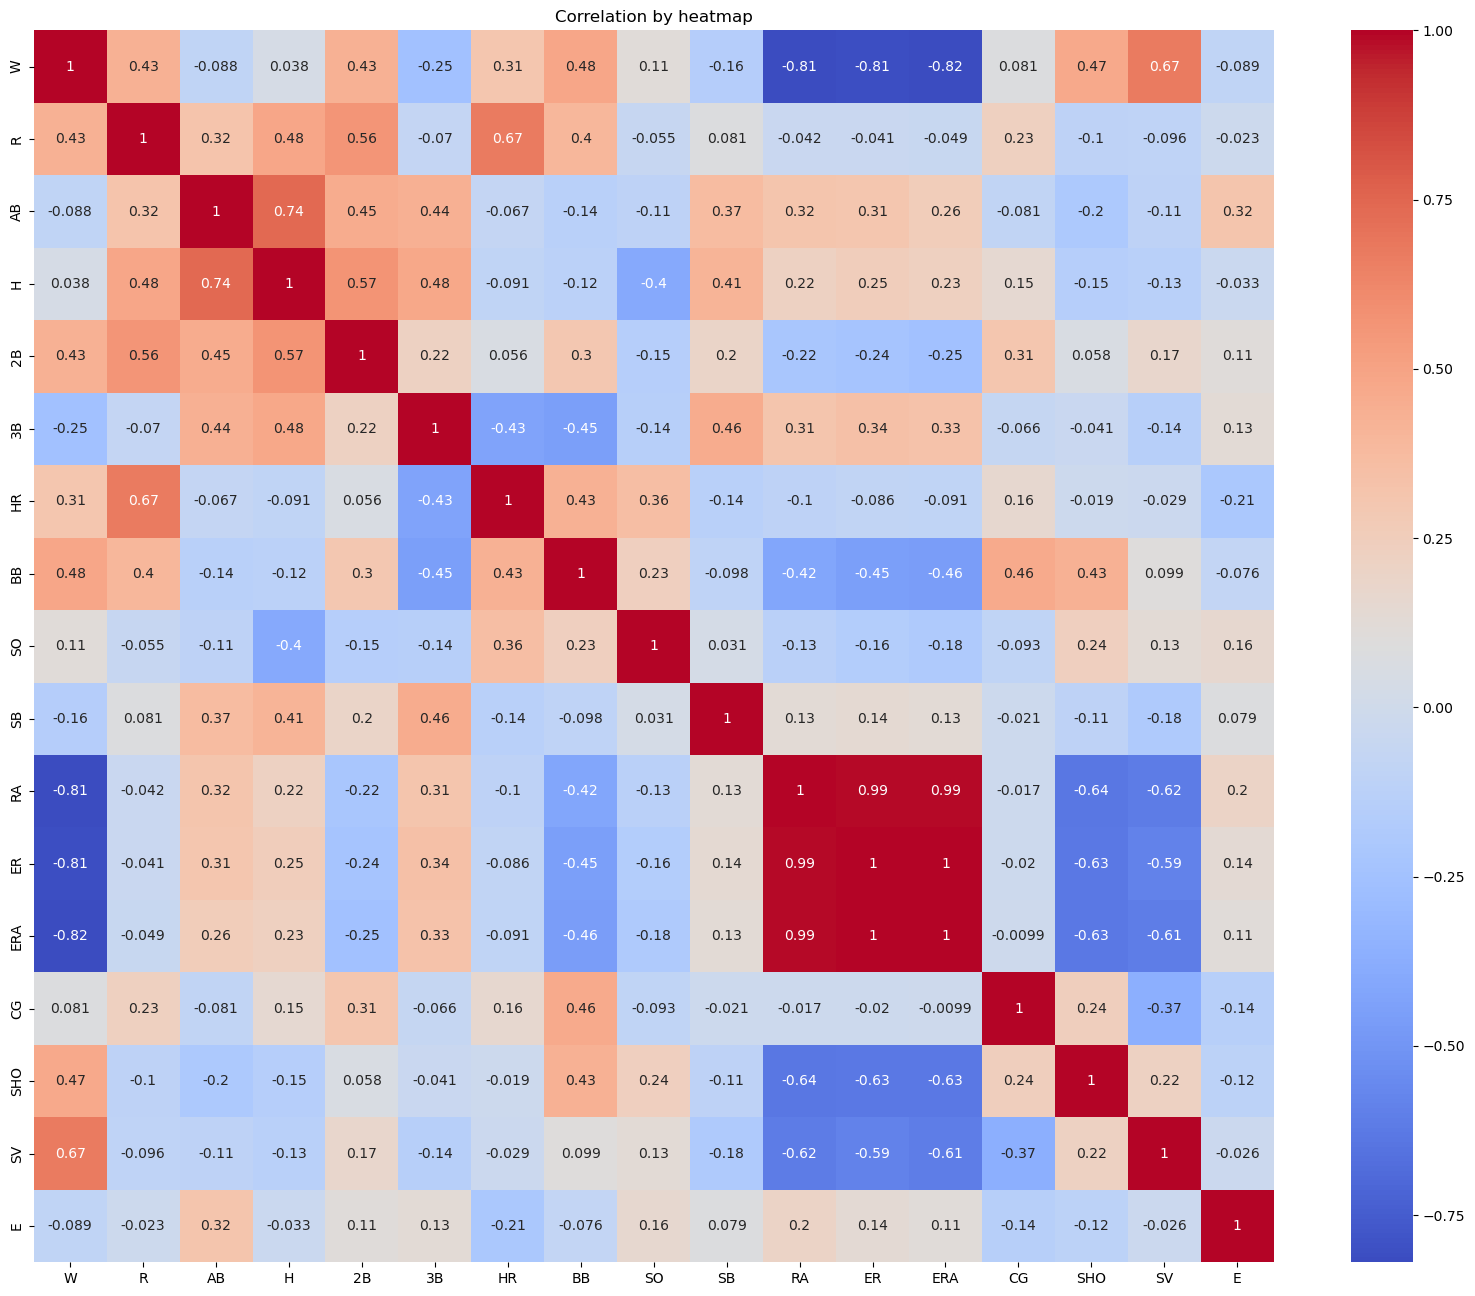

In [18]:
# As it is difficult to identify correlation with the help of above code let's check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

we can see that ERA is having high correlation with RA and ER both which can cause multicollinearity issue so let's drop this column s that it can be fixed.

In [24]:
df.drop(columns=['RA'], inplace=True)

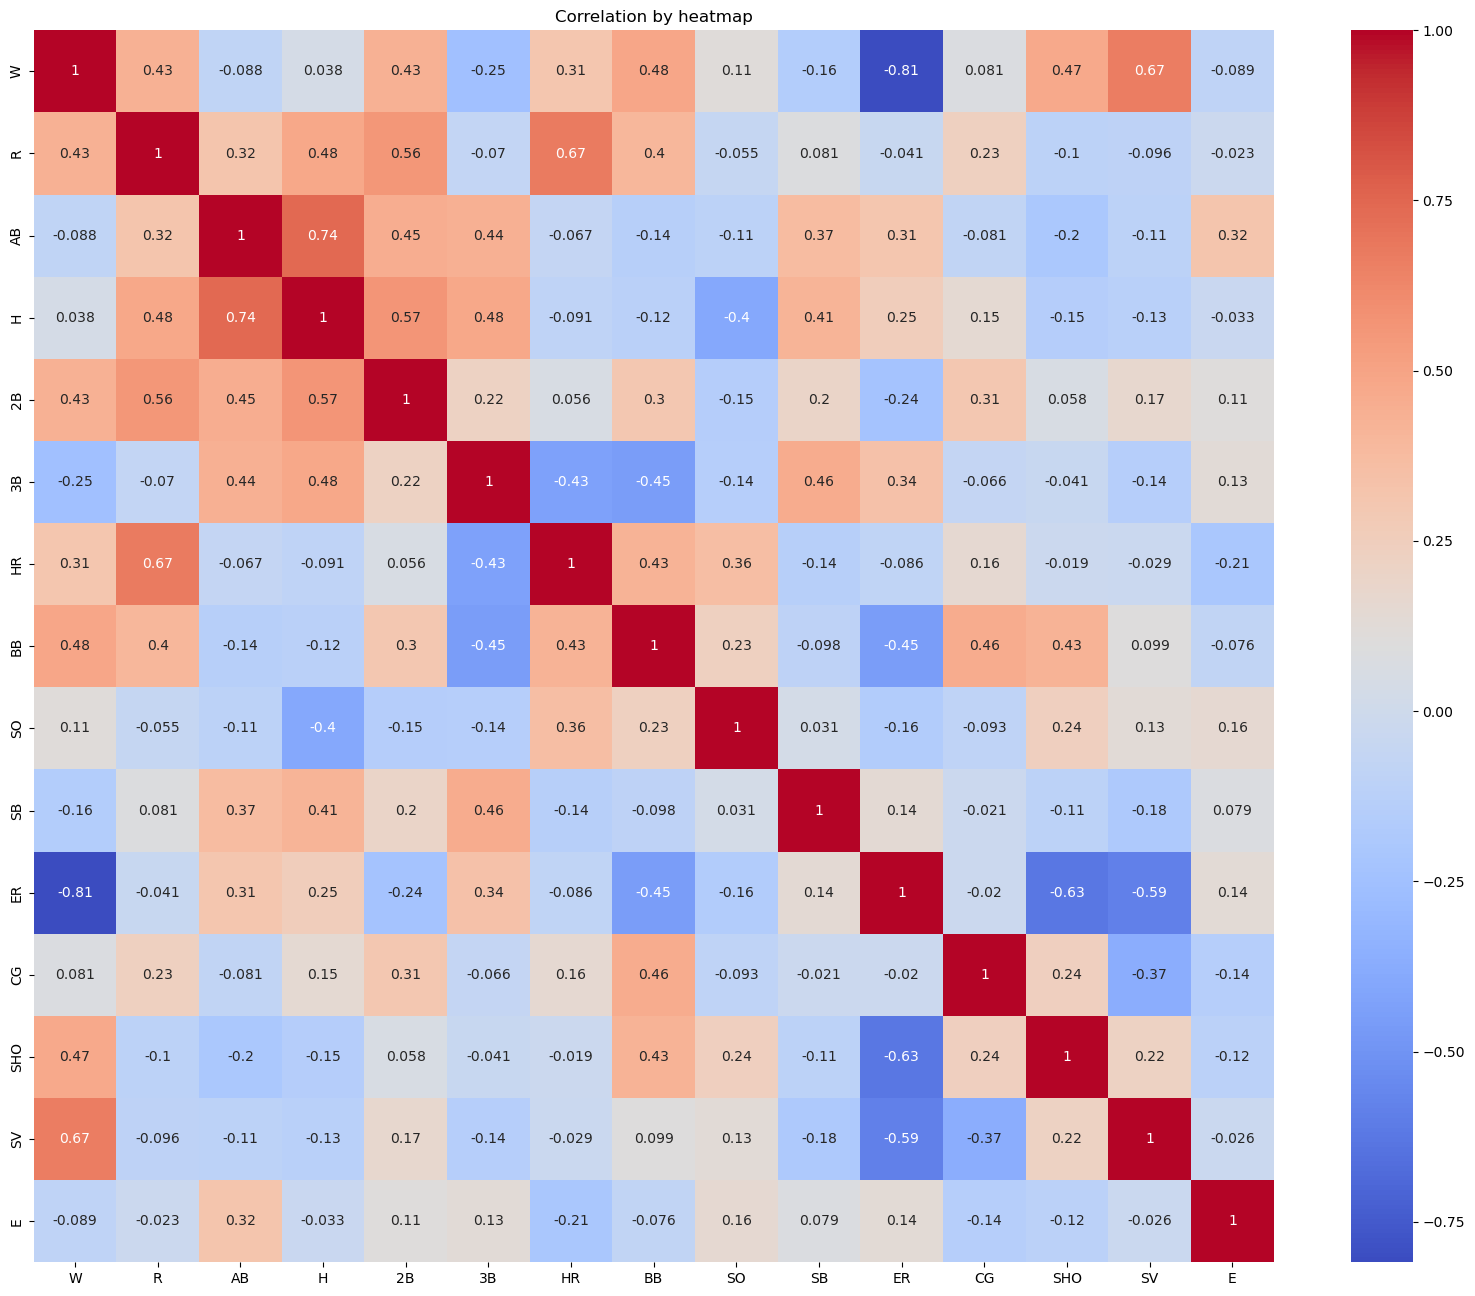

In [25]:
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can see that we have successfully resolved multicollinearity issue and now we can proceed further with different kinds of EDA and data preprocessing.

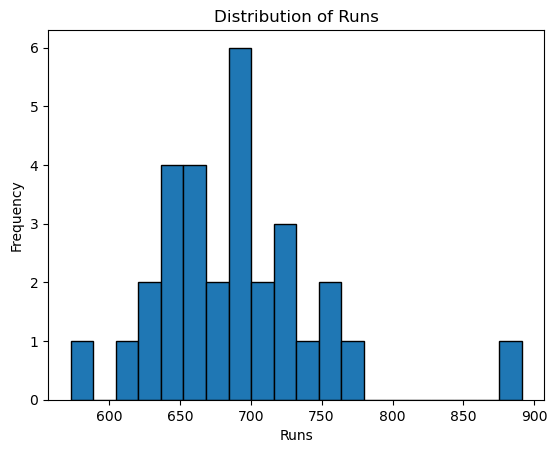

In [31]:
plt.hist(df['R'], bins=20,edgecolor='black')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs')
plt.show()

With the help of above analysis we can see distribution of Runs with their frequency by which we can understand how much runs has been scored as an average and we can see maximum number is around 690 as R olumn denoted runs

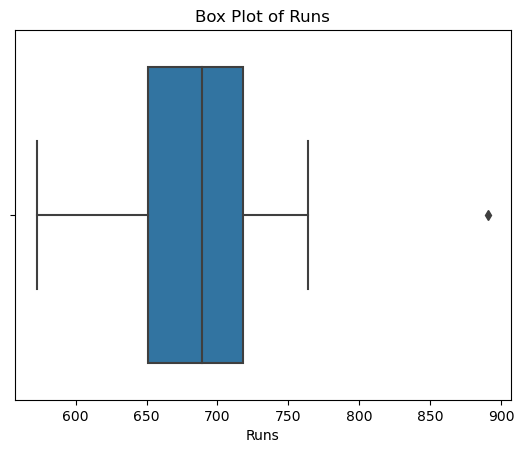

In [34]:
sns.boxplot(x='R', data=df)
plt.xlabel('Runs')
plt.title('Box Plot of Runs')
plt.show()

With the help of above plt we can see that we have average runs about 650 also we are havong utliers in run column which we'll check further and proceed to remove them for better result.

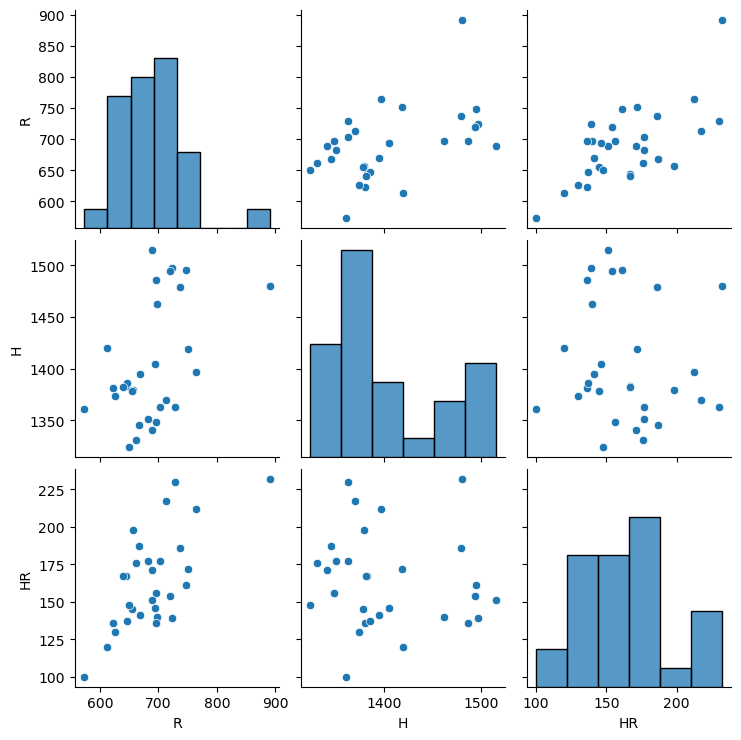

In [37]:
sns.pairplot(df[['R', 'H', 'HR']])
plt.show()

Hwere is the scatter plot of runs, hits, homeruns by which we can identify that we have too much scattered data from which we have to dealt with

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

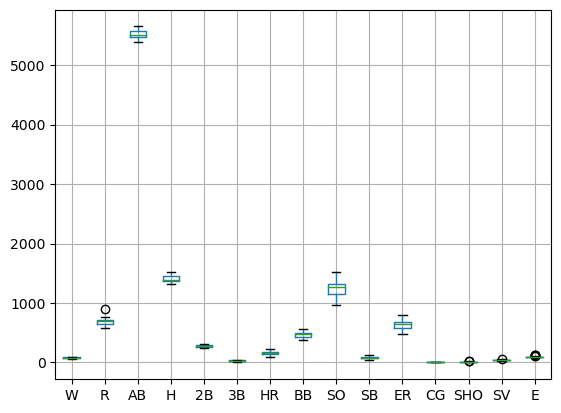

In [40]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks

In [41]:
#Let's find outlier with Zscore method
outliers=df[['R','AB','H','2B','HR','BB','SO','SB','ER','CG','SHO','SV','E']]
z=np.abs(zscore(outliers))
z

,R,AB,H,2B,HR,BB,SO,SB,ER,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,0.787299,1.534902,2.697630,0.913883,0.505110,0.539806,0.814629,1.671607,0.461470
1,0.134432,0.711094,0.970681,0.127403,0.243967,0.536592,0.154878,0.601826,0.248930,0.539806,0.172800,0.249879,0.607197
2,0.332906,1.115233,0.151891,1.588795,0.723377,1.139144,0.893982,0.111449,0.751623,2.772641,0.320914,0.654856,1.117242
3,1.146419,0.241522,0.401088,0.828122,0.883181,1.160536,0.168602,0.690985,0.103922,1.300442,0.567771,0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,0.403770,0.251360,0.105866,0.022290,1.597501,1.300442,0.172800,1.042600,0.607197
5,3.509647,0.104884,1.361089,1.869832,2.185047,1.798742,0.952796,0.200609,0.389104,1.300442,0.320914,1.171848,0.461470
6,1.311430,0.732263,0.116292,0.153633,1.545833,1.513510,0.207812,0.913883,0.234429,0.171757,1.802057,0.637623,0.097152
7,0.428681,0.451289,0.596886,1.615025,1.705636,0.910958,0.811641,1.760897,0.147424,1.275906,0.320914,0.008617,1.262970
8,0.765626,0.451289,0.365489,0.183611,0.107601,0.590073,0.605790,0.156029,0.461608,0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.084163,0.158660,0.982204,0.557246,0.843461,0.171757,0.320914,0.396360,0.194303


In [42]:
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

In [43]:
df1=df[(z<3).all(axis=1)]

In [44]:
df1.shape

(29, 15)

We can see that we have successfully removed outliers without much dataloss which is good for further analysis and model.

In [45]:
#let's check skewness of our data
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ER     0.018461
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

we can see that some of our columns are skewed which are H,CG, SHO, SV and E, let's treat them acordingly.

In [46]:
#first will use square root methos to remove skewness from these columns
df1['H']=np.square(df1['H'])
df1['CG']=np.square(df1['CG'])
df1['SHO']=np.square(df1['SHO'])
df1['SV']=np.square(df1['SV'])
df1['E']=np.square(df1['E'])

In [47]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.827717
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ER     0.018461
CG     2.489298
SHO    1.554216
SV     1.096153
E      1.069807
dtype: float64

we can see that we are getting even more skewed data in this case lets's use cuberoot method.

In [48]:
df1['H']=np.cbrt(df1['H'])
df1['CG']=np.cbrt(df1['CG'])
df1['SHO']=np.cbrt(df1['SHO'])
df1['SV']=np.cbrt(df1['SV'])
df1['E']=np.cbrt(df1['E'])

In [49]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.768812
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ER     0.018461
CG     0.219277
SHO    0.123377
SV     0.457783
E      0.757475
dtype: float64

Here we g, after performing cuberoot methos we have less skewed data and as error is not contributing much also having skewness let's remove this column.

In [52]:
df1.drop(columns=['E'], inplace=True)

In [54]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ER', 'CG','SHO', 'SV']
target = 'W'

In [55]:
x = df1[features]
y = df1[target]

In [56]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (29, 13)
dimension of dependent variable: (29,)


We can see that we are having same number of rows that is 29 rows and 13 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [71]:
#let's find best random state with maximum r2 score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.9063796291325508 on Randome_state 0


In [72]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = maxRS)

Now we'll check different models so that we can understand which model would be more efficient for us.

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: -0.805908904390644
R2 score on training Data: 100.0
Mean Absolute Error: 8.444444444444445
Mean Squared Error: 108.66666666666667
Root Mean Squared Error: 10.424330514074594


In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR=rfr.predict (x_test)
pred_train=rfr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RFR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.27537277390233916
R2 score on training Data: 92.67446817350839
Mean Absolute Error: 5.734444444444445
Mean Squared Error: 43.60287777777777
Root Mean Squared Error: 6.603247517530883


In [98]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.6097803857201476
R2 score on training Data: 100.0
Mean Absolute Error: 3.9177777777777782
Mean Squared Error: 23.480622222222237
Root Mean Squared Error: 4.845680780057869


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.08264156484329321
R2 score on training Data: 99.99999676983558
Mean Absolute Error: 6.018296378447783
Mean Squared Error: 55.200061888318395
Root Mean Squared Error: 7.429674413345338


In [77]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.4171440766683273
R2 score on training Data: 97.69089687407242
Mean Absolute Error: 5.052415829054076
Mean Squared Error: 35.07209592985893
Root Mean Squared Error: 5.922169866683911


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [65]:
from sklearn.model_selection import cross_val_score

In [78]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[ -1.63522727 -11.93421053   0.30572982   0.59016393   0.15978774]
-2.5027512617217695
Difference between R2 score and cross validation score is : 249.46921726778632


In [79]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[ 0.34027682 -5.22461184  0.45438971  0.55746967  0.86800088]
-0.6008949511881039
Difference between R2 score and cross validation score is : 60.36486789271273


In [80]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[ 0.06042045 -2.90741053  0.55573275  0.40615656  0.84316303]
-0.20838754718572866
Difference between R2 score and cross validation score is : 21.475061837981976


In [81]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[ 0.29237662 -8.05640523  0.47018795  0.60692377  0.74601768]
-1.1881798420000729
Difference between R2 score and cross validation score is : 118.90062576485059


In [82]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[ 0.57541447 -0.945281    0.65077715  0.68954199  0.82082222]
0.35825496769921344
Difference between R2 score and cross validation score is : -35.408352693253015


With the above cross valiadation we can see that extra tree regressor uis working absolutely perfect and best with our data so let's select this model and perform hyperparameter tunning.

In [106]:
#Lets test our data by grid search
from sklearn.model_selection import RandomizedSearchCV

In [107]:
param={'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_leaf_nodes': [None, 50, 100],
    'bootstrap': [True, False]}
Rscv=RandomizedSearchCV(ExtraTreesRegressor(),param,cv=5)
Rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [None, 50, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1],
                                        'n_estimators': [100, 200, 300]})

In [108]:
Rscv.best_params_

{'n_estimators': 200,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 50,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [109]:
Model=ExtraTreesRegressor(n_estimators= 200, min_weight_fraction_leaf= 0.1, min_samples_split= 2,min_samples_leaf= 4,
max_leaf_nodes= 50,max_features= 'auto',max_depth= 10, bootstrap= False)

In [110]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.6268164460218282
Mean Absolute Error: 3.718513888888898
Mean Squared Error: 22.45551409987173
Root Mean Squared Error: 4.738724944525872


We can see that at the final stage ur model is giving r2 score of 62 which can be considered as good accuracy score.

Now let's save our model by pickle method

In [112]:
import pickle
filename='Baseball.pkl'
pickle.dump(Model,open(filename,'wb'))

We've already saved our work with above code let's reopen the model and check r2 score

In [113]:
Load_model=pickle.load(open('World hapiness.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

62.681644602182814


We can see our accuracy score above, let's also check prediction of our model manually.

In [114]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [115]:
Conclusion

,0,1,2,3,4,5,6,7,8
Predicted,83.116107,84.309917,71.602887,76.960929,80.487833,84.379583,75.688857,81.292536,83.396357
Original,81.000000,83.000000,63.000000,68.000000,85.000000,84.000000,74.000000,79.000000,87.000000


# Thank you